### 미분(differentiation)이란?
- 미분 : **변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구**로 최적화에서 제일 많이 사용하는 기법이다.

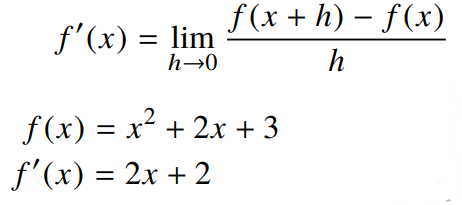

### 파이썬으로 미분 하기

In [8]:
import sympy as sym
from sympy.abc import x, y

sym.diff(sym.poly(x**2 + x*2 + 3), x)

Poly(2*x + 2, x, domain='ZZ')

### 미분을 그림으로 이해하기
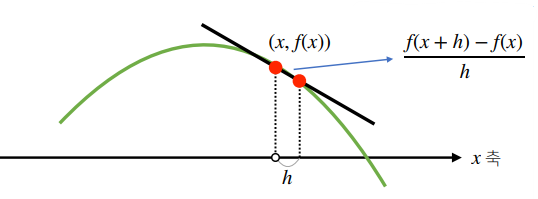
위 함수에서 h를 0으로 보내면 (x, f(x))에서 접선의 기울기로 수렴한다
- 함수 f의 주어진 점 (x, f(x)) 에서의 **접선의 기울기**를 구한다.
- 한 점에서 접선의 기울기를 알면 어느 방향으로 점을 움직여야 함수값이 **증가**하는지 / **감소**하는지 알 수 있다.

- **미분값을 더하면 경사상승법(gradient ascent)**이라 하며 함수의 **극대값**의 위치를 구할 때 사용함.
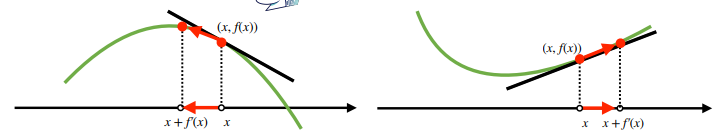

- **미분값을 더하면 경사하강법(gradient descent)**이라 하며 함수의 **극소값**의 위치를 구할 때 사용함.
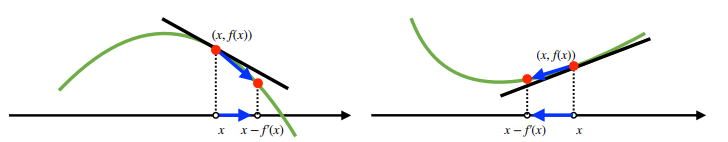

#### - 경사상승/경사하강 방법은 극값에 도달하면 움직임을 멈춘다.

----
### 파이썬으로 경사하강법 구현해보기
### f(x) = x^2 + 2*x + 3 일 때 경사하강법으로 최소점을 찾는 코드

In [6]:
import numpy as np

def func(val):
    fun = sym.poly(x**2 + 2*x + 3)
    return fun.subs(x, val), fun

def func_gradient(fun ,val):
    _, function = fun(val)
    diff = sym.diff(function, x)
    return diff.subs(x, val)

def gradient_descent(fun, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt = 0
    val = init_point
    diff= func_gradient(fun, init_point)
    while np.abs(diff) > epsilon:
        val = val - lr_rate*diff
        diff= func_gradient(fun, val)
        cnt += 1
        
    print("함수 : {}, 연산횟수: {}, 최소점: ({}, {})".format(fun(val)[1], cnt, val, fun(val)[0]))

gradient_descent(fun=func, init_point=np.random.uniform(-2, 2))

함수 : Poly(x**2 + 2*x + 3, x, domain='ZZ'), 연산횟수: 611, 최소점: (-0.999995010262000, 2.00000000002490)


----
### 변수가 벡터일 때
- 벡터가 입력인 다변수 함수의 경우 편미분(partial differentiation)을 사용한다.
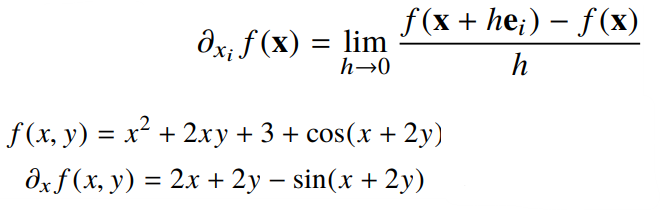
ei는 i번 째 값만 1이고 나머지는 0인 단위벡터이다.
- 각 변수 별로 편미분을 계산한 **그레디언트(gradient) 벡터**를 이용하여 경사하강/경사상승법에 사용할 수 있다.
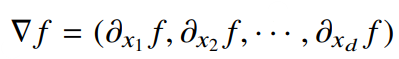

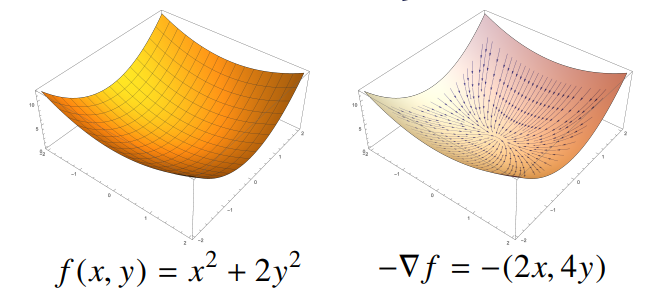
f(x,y)를 x와 y로 각각 편미분 하여 -부호를 붙여주면 각 점에서 **가장 빨리 감소하게 되는 방향**과 같다.

#### 파이썬으로 구현하기
#### f(x) = x^2 + 2*y^2 일 때 경사하강법으로 최소점을 찾는 코드

In [11]:
def eval_(fun, val):
    val_x, val_y = val
    fun_eval = fun.subs(x, val_x).subs(y, val_y)
    return fun_eval

def func_multi(val):
    x_, y_ = val
    func = sym.poly(x**2 + 2*y**2)
    return eval_(func, [x_, y_]), func

def func_gradient(fun, val):
    x_, y_ = val
    _, function = fun(val)
    diff_x = sym.diff(function, x)
    diff_y = sym.diff(function, y)
    grad_vec = np.array([eval_(diff_x, [x_, y_]), eval_(diff_y, [x_, y_])], dtype=float)
    return grad_vec, [diff_x, diff_y]

def gradient_descent(fun, init_point, lr_rate=1e-2, epsilon=1e-5):
    cnt = 0
    val = init_point
    diff, _ = func_gradient(fun, val)
    while np.linalg.norm(diff) > epsilon:
        val -= lr_rate * diff
        diff, _ = func_gradient(fun, val)
        cnt += 1
        
    print("함수 : {}, 연산횟수 : {}, 최소점 : ({}, {})".format(fun(val)[1], cnt, val, fun(val)[0]))
    
pt = [np.random.uniform(-2, 2), np.random.uniform(-2, 2)]
gradient_descent(fun=func_multi, init_point=pt)

함수 : Poly(x**2 + 2*y**2, x, y, domain='ZZ'), 연산횟수 : 627, 최소점 : ([ 4.98934625e-06 -5.82148319e-12], 2.48935759773671E-11)
